In [7]:
import matplotlib
import matplotlib.pyplot as plt
from itertools import chain
import numpy as np

plt.rcParams.update({
    "text.usetex": True,         
    "font.family": "serif",       
    "text.latex.preamble": r"\usepackage{amsmath}",
    'font.size': 24,         
    'axes.labelsize': 29,    
    'xtick.labelsize': 24,   
    'ytick.labelsize': 24,  
    'legend.fontsize': 20,
    'lines.linewidth': 5,    
    'lines.markersize': 5   
})


def IMQ(y, gamma, beta, c):
    return beta * (1 + ((y - gamma)/c)**2)**(-0.5)

C:\Users\joshu\AppData\Local\Temp\ipykernel_15020\3289904703.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


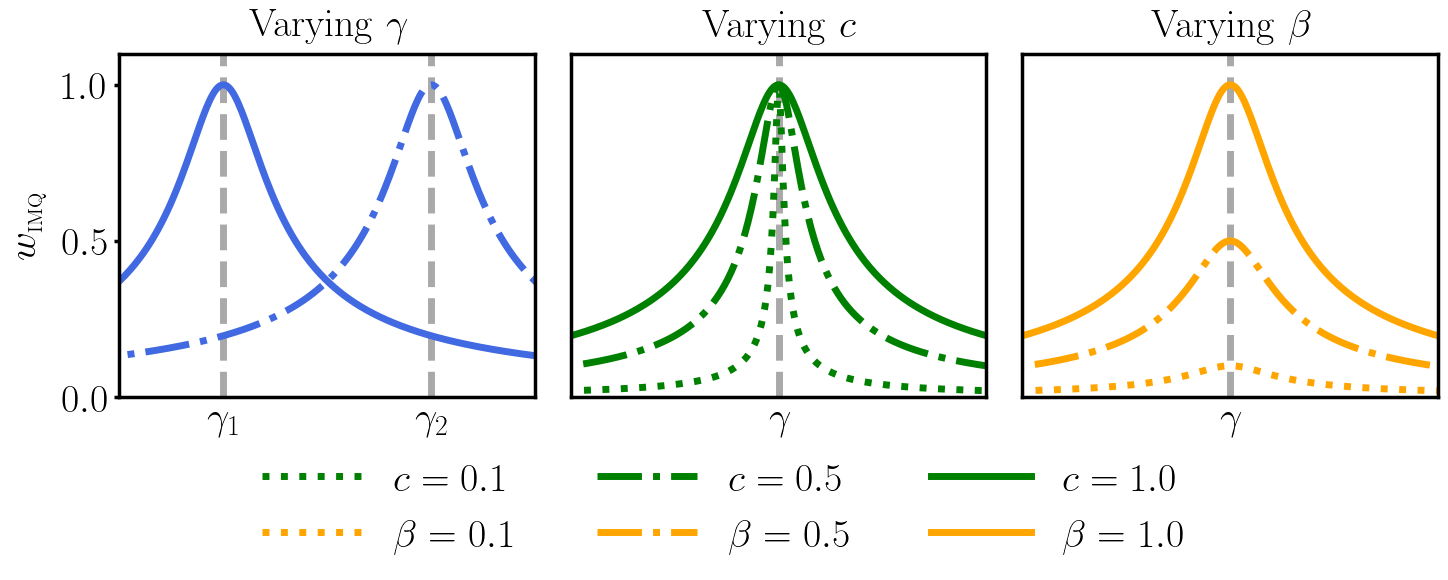

In [ ]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
y = np.linspace(-10, 10, 500)
padding = 12

# --- Plot 1: Varying γ ---
c = 1
gammas = [-2.5, 2.5]
beta = 1
linestyles_gamma = ['-', '-.']

axes[0].set_ylim(0, 1.1)
axes[0].set_yticks([0, 0.5, 1])
axes[0].set_xticks([-2.5, 2.5])
axes[0].set_xticklabels([r'$\gamma_1$', r'$\gamma_2$'])
axes[0].tick_params(axis='x', which='both', length=0)
axes[0].axvline(-2.5, color='#A9A9A9', linestyle='--')
axes[0].axvline(2.5, color='#A9A9A9', linestyle='--')
axes[0].set_xlim(-5, 5)
axes[0].set_title(r'Varying $\gamma$', pad=padding)
axes[0].set_ylabel(r'$w_{\scriptscriptstyle\mathrm{IMQ}}$', labelpad=padding)

for gamma, ls in zip(gammas, linestyles_gamma):
    imq_values = IMQ(y, gamma, beta, c)
    axes[0].plot(y, imq_values, color='royalblue', linestyle=ls)

# --- Plot 3: Varying c ---
gamma = 0
cs = [0.1, 0.5, 1.0]
linestyles_c = [':', '-.', '-']
c_lines = []

axes[1].set_ylim(0, 1.1)
axes[1].set_xticks([0])
axes[1].set_xticklabels([r'$\gamma$'])
axes[1].tick_params(axis='x', which='both', length=0)
axes[1].tick_params(axis='y', left=False, labelleft=False)
axes[1].axvline(0, color='#A9A9A9', linestyle='--')
axes[1].set_xlim(-5, 5)
axes[1].set_title(r'Varying $c$', pad=padding)

for c, ls in zip(cs, linestyles_c):
    imq_values = IMQ(y, gamma, beta, c)
    line, = axes[1].plot(y, imq_values, color='green', linestyle=ls)
    c_lines.append(line)

# --- Plot 3: Varying β ---
gamma = 0
c = 1
betas = [0.1, 0.5, 1.0]
linestyles_beta = [':', '-.', '-']
beta_lines = []

axes[2].set_ylim(0, 1.1)
axes[2].set_xticks([0])
axes[2].tick_params(axis='y', left=False, labelleft=False)
axes[2].set_xticklabels([r'$\gamma$'])
axes[2].tick_params(axis='x', which='both', length=0)
axes[2].axvline(0, color='#A9A9A9', linestyle='--')
axes[2].set_xlim(-5, 5)
axes[2].set_title(r'Varying $\beta$', pad=padding)

for beta, ls in zip(betas, linestyles_beta):
    imq_values = IMQ(y, gamma, beta, c)
    line, = axes[2].plot(y, imq_values, color='orange', linestyle=ls)
    beta_lines.append(line)

# --- Combined Legend ---
labels_beta = [r'$\beta = {}$'.format(b) for b in betas]
labels_c = [r'$c = {}$'.format(c) for c in cs]
legend_lines = beta_lines + c_lines
legend_labels = labels_beta + labels_c

# Determine font size from title
title_fontsize = axes[0].title.get_fontsize()

# Add legend as new axis
legend_ax = fig.add_axes([0.1, -0.12, 0.8, 0.1])  # [left, bottom, width, height]
legend_ax.axis('off')

# Interleave beta_lines and c_lines and their labels
interleaved_lines = list(chain.from_iterable(zip(c_lines, beta_lines)))
interleaved_labels = list(chain.from_iterable(zip(labels_c, labels_beta)))

legend = legend_ax.legend(
    interleaved_lines,
    interleaved_labels,
    loc='center',
    ncol=3,
    frameon=False,
    fontsize=title_fontsize,
    handlelength=2.5,
    columnspacing=2.0
)

# --- Apply font size and tick width adjustments ---

# Set ticks font size on all axes to title font size
for ax in axes:
    ax.tick_params(axis='x', labelsize=title_fontsize)
    ax.tick_params(axis='y', labelsize=title_fontsize)

# Increase tick width on the leftmost plot to match border thickness (2.5)
axes[0].tick_params(width=2.5)

# Increase border thickness on all subplots
for ax in axes:
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

plt.tight_layout()
plt.show()

# fig.savefig("./results/imq_varying_params.pdf", format='pdf', bbox_inches='tight')

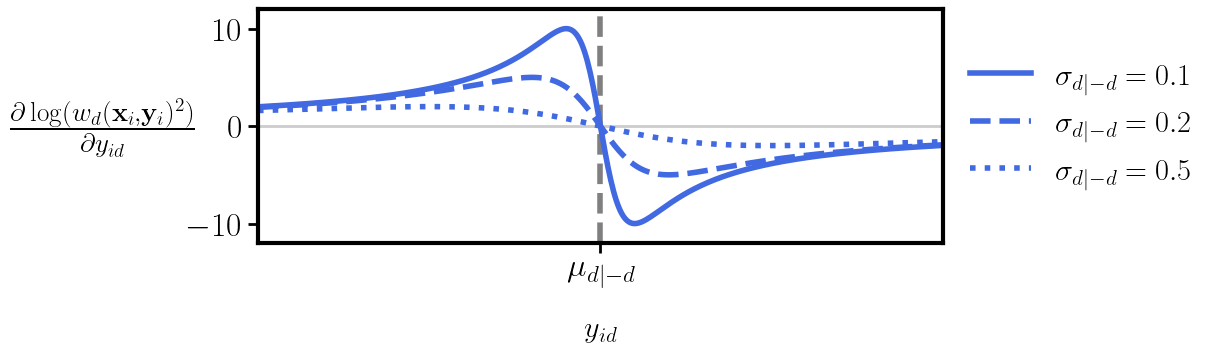

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(y, mu, std):
    diff = y - mu
    return -2 * diff / (std**2 + diff**2)

# Define values
mu = 0
y = np.linspace(-1, 1, 500)

std_values = [0.1, 0.2, 0.5]
line_styles = ['-', '--', ':']

# Set wider figure size
fig = plt.figure(figsize=(10, 4))
plt.axvline(0, color='grey', linestyle='--', linewidth=4)
plt.axhline(0, color='black', linewidth=2, alpha=0.2)

# Plot each line
for std, style in zip(std_values, line_styles):
    plt.plot(y, f(y, mu, std), color='royalblue', linestyle=style, label=rf'$\sigma_{{d|-d}} = {std}$', linewidth=4)

# Plot settings
plt.xlabel(r'$y_{id}$', labelpad=20, fontsize=22)
plt.ylabel(r'$\frac{\partial \log (w_d(\mathbf{x}_i, \mathbf{y}_i)^2)}{\partial y_{id}}$',
           rotation=0, labelpad=-5, ha='right', va='center', fontsize=28)

# Remove all x-ticks except at 0 with label 'μ'
plt.xticks([0], [r'$\mu_{d|-d}$'])

plt.ylim(-12, 12)
plt.xlim(-1, 1)
plt.tight_layout()

# Thicker borders
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)

# Make ticks larger and thicker
ax.tick_params(axis='both', which='major', width=2, length=7)

# Place legend outside to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22, frameon=False)

plt.show()

# fig.savefig("./results/gradient_varying_c.pdf", format='pdf', bbox_inches='tight')